In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,28*28).astype("float32")/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
print(x_train.shape)

(60000, 784)


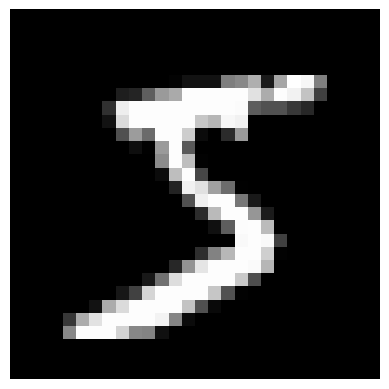

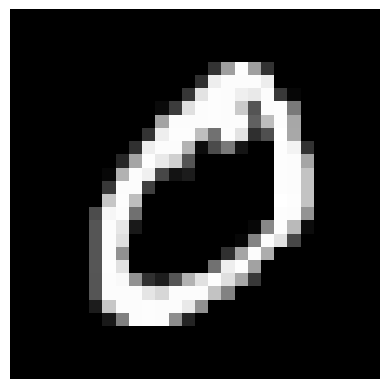

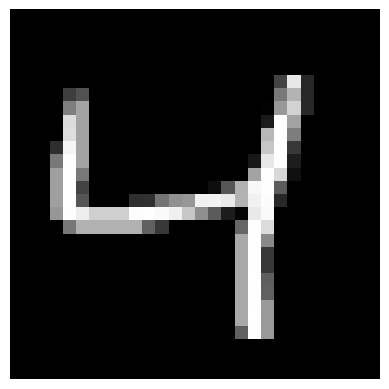

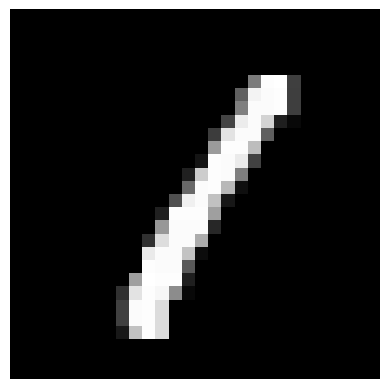

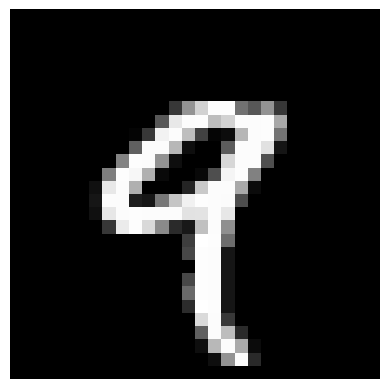

In [3]:
def show_image(image):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Display a sample image from the training data
for i in range(5):

  sample_index = i
  show_image(x_train[sample_index])

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [5]:
# sequential API
model = keras.Sequential(
  [
      keras.Input(shape=(28*28)),
      layers.Dense(512,activation = 'relu'),
      layers.Dense(256,activation = 'relu'),
      layers.Dense(10),
  ]
)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate =0.001),
    metrics = ["accuracy"],
)

ValueError: Cannot convert '784' to a shape.

In [ ]:
model.fit(x_train,y_train,batch_size = 32,epochs = 5,verbose = 1)
model.evaluate(x_test,y_test,batch_size = 32,verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9944
313/313 - 1s - loss: 0.0932 - accuracy: 0.9789 - 520ms/epoch - 2ms/step


[0.09323643893003464, 0.9789000153541565]

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# functional api
inputs = keras.Input(shape=(784))
x = layers.Dense(512,activation = 'sigmoid',name = "first_layers")(inputs)
x = layers.Dense(256,activation = 'sigmoid',name = 'second_layers')(x)
outputs = layers.Dense(10,activation = 'softmax')(x)
model = keras.Model(inputs=inputs,outputs = outputs)
opt = ['Gradient_Descent','Mometum','Adagrad','RMSprop','Adam']


model.compile(
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
      optimizer = keras.optimizers.Adam(learning_rate = 0.01),
      metrics = ["accuracy"],
  )

In [ ]:
model.fit(x_train,y_train,batch_size = 32,epochs = 5,verbose = 2)
model.evaluate(x_test,y_test,batch_size = 32,verbose = 2)

Epoch 1/5
1875/1875 - 6s - loss: 0.2343 - accuracy: 0.9295 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 4s - loss: 0.1231 - accuracy: 0.9631 - 4s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.1090 - accuracy: 0.9662 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 5s - loss: 0.1057 - accuracy: 0.9685 - 5s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 4s - loss: 0.0988 - accuracy: 0.9699 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.1285 - accuracy: 0.9627 - 625ms/epoch - 2ms/step


[0.1285351663827896, 0.9627000093460083]

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 first_layers (Dense)        (None, 512)               401920    
                                                                 
 second_layers (Dense)       (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation='sigmoid', name="first_layer")(inputs)
x = layers.Dense(256, activation='sigmoid', name='second_layer')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# List of optimizers
opt = ['GradientDescent', 'Momentum', 'Adagrad', 'RMSprop', 'Adam']

# Dictionary to map optimizer names to their corresponding classes
optimizer_classes = {
    'GradientDescent': tf.keras.optimizers.SGD,
    'Momentum': lambda: tf.keras.optimizers.SGD(momentum=0.9),
    'Adagrad': tf.keras.optimizers.Adagrad,
    'RMSprop': tf.keras.optimizers.RMSprop,
    'Adam': tf.keras.optimizers.Adam
}

# Loop through each optimizer and compile the model
for optimizer_name in opt:
    if optimizer_name == 'Momentum':
        optimizer_instance = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    else:
        optimizer_class = optimizer_classes[optimizer_name]
        optimizer_instance = optimizer_class(learning_rate=0.01)

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        optimizer=optimizer_instance,
        metrics=["accuracy"],
    )
    print(f"Compiled model with optimizer: {optimizer_name}")
    model.fit(x_train,y_train,batch_size = 32,epochs = 5,verbose = 2)
    model.evaluate(x_test,y_test,batch_size = 32,verbose = 2)

Compiled model with optimizer: GradientDescent
Epoch 1/5
1875/1875 - 5s - loss: 2.1164 - accuracy: 0.3971 - 5s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 4s - loss: 1.3536 - accuracy: 0.7107 - 4s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.7956 - accuracy: 0.8116 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 5s - loss: 0.5944 - accuracy: 0.8483 - 5s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 4s - loss: 0.5011 - accuracy: 0.8662 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.4519 - accuracy: 0.8775 - 631ms/epoch - 2ms/step
Compiled model with optimizer: Momentum
Epoch 1/5
1875/1875 - 4s - loss: 0.3844 - accuracy: 0.8887 - 4s/epoch - 2ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.3131 - accuracy: 0.9082 - 5s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.2816 - accuracy: 0.9178 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.2582 - accuracy: 0.9242 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.2348 - accuracy: 0.9307 - 5s/epoch - 2ms/step
313/313 - 1s - loss: 0.2143 - a